In [51]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("handled-car-mpg.csv")

columns_to_drop = ['mpg']
# Separate features (X) and target (y)
X = df.drop(columns=columns_to_drop, axis=1).values
y = df['mpg'].values.reshape(-1, 1)


# Step 1: Shuffle the data
np.random.seed(42)  # for reproducibility
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# Step 2: 80/20 split
split_index = int(0.8 * X.shape[0])
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 3: Z-score normalization (standardization) for X
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std  # use train mean & std!

# Step 4: Initialize parameters
m, n = X_train_scaled.shape
w = np.random.uniform(low=-1.0, high=1.0, size=(n, 1))
b = 0.0


# **Multiple Linear Regression model from Scratch**

In [52]:
#Functions

def compute_cost(x, y, w, b):
    m,n = x.shape

    f_wb = np.dot(x,w) + b
    cost = (1/(2 *m)) * np.sum((f_wb - y)**2)
    return cost
    
def compute_gradient(x, y, w, b, L2_reg):
    m = x.shape[0]

    f_wb = np.dot(x, w) + b          # shape (m, 1)
    error = f_wb - y                 # shape (m, 1)

    dj_dw = ((1/m) * np.dot(x.T, error)) + ((L2_reg/m) * w)  # shape (n, 1)
    dj_db = ((1/m) * np.sum(error))       # scalar

    return dj_dw, dj_db

def gradient_descent(lr, x, y, w, b, L2_reg, previous_cost, threshold, max_iters=1000000):
    m = x.shape[0]
    iters = 0
    L2_reg = L2_reg
    cost_log = []
    iteration_log = []
    weight_log = []
    bias_log = []

    while True:
        
        dj_dw, dj_db = compute_gradient(x, y, w, b, L2_reg)
        w = w - (lr/m)*(dj_dw)
        b = b - (lr/m)*(dj_db)

        current_cost = compute_cost(x, y, w, b)

        if iters % 100 == 0:
            print(f"Iteration {iters} | Cost: {current_cost:.5f} | w: {w.ravel()} | b: {b:.5f}")
            # if iters < 1001 and iters % 200 == 0 and iters > 1:
            #     cost_log.append(current_cost)
            #     iteration_log.append(iters)
            #     weight_log.append(w.flatten().tolist())  # Save as list
            #     bias_log.append(b)
            # elif iters < 10000 and iters > 1001 and iters % 1000 == 0:
            #     cost_log.append(current_cost)
            #     iteration_log.append(iters)
            #     weight_log.append(w.flatten().tolist())  # Save as list
            #     bias_log.append(b)
        
        # if iters % 10000 == 0:
        #     cost_log.append(current_cost)
        #     iteration_log.append(iters)
        #     weight_log.append(w.flatten().tolist())  # Save as list
        #     bias_log.append(b)
            
        if abs(current_cost-previous_cost) < threshold:
            print(f"Converged in {iters} iterations.")
            break

        previous_cost = current_cost
        iters += 1
        if iters >= max_iters:
            print("Stopped: Max iterations reached.")
            break


    return w , b # ,cost_log , iteration_log , weight_log , bias_log

def predict(x_test_scaled, w, b):
    return np.dot(x_test_scaled,w) + b
    

In [53]:
wf , bf  = gradient_descent(0.2,X_train_scaled,y_train,w,b,L2_reg=0.5,previous_cost=float('inf'),threshold=1e-9,max_iters=10000000)

Iteration 0 | Cost: 296.71939 | w: [ 0.65507394 -0.45306504  0.93011476 -0.08638655  0.68080508 -0.61379112
 -0.17509942  0.3949462  -0.72723459 -0.73845663] | b: 0.01480
Iteration 100 | Cost: 254.53105 | w: [ 0.58891959 -0.12005547  0.89082513 -0.16890092  0.40616195 -0.84001377
  0.00632438  0.04213868 -1.06493259 -1.0775179 ] | b: 1.44835
Iteration 200 | Cost: 220.72951 | w: [ 0.52388815  0.12860768  0.85138028 -0.23600718  0.21120581 -1.01908594
  0.12692066 -0.22162494 -1.31148767 -1.32660973] | b: 2.79314
Iteration 300 | Cost: 192.77113 | w: [ 0.46067018  0.31486615  0.81249976 -0.29104104  0.07426682 -1.16299292
  0.20345131 -0.41999183 -1.49125807 -1.50984573] | b: 4.05466
Iteration 400 | Cost: 169.12804 | w: [ 0.39971035  0.45485653  0.7746673  -0.33652294 -0.02050915 -1.28054852
  0.24817471 -0.57030779 -1.62210485 -1.64489749] | b: 5.23807
Iteration 500 | Cost: 148.83782 | w: [ 0.34127686  0.56045469  0.73819661 -0.37436874 -0.08471486 -1.37824006
  0.27004953 -0.68529737 -1

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_train = predict(X_train_scaled, wf, bf)

# Calculate metrics
mse_t = mean_squared_error(y_train, y_pred_train)
mae_t = mean_absolute_error(y_train, y_pred_train)
r2_t = r2_score(y_train, y_pred_train)

# Print results
print(f"\n📊 Training Metrics (from sklearn):")
print(f"Mean Squared Error (MSE): {mse_t:.4f}")
print(f"Mean Absolute Error (MAE): {mae_t:.4f}")
print(f"R² Score: {r2_t:.4f}")


📊 Training Metrics (from sklearn):
Mean Squared Error (MSE): 8.9530
Mean Absolute Error (MAE): 2.1749
R² Score: 0.8550


## **Testing Model and Metrics**

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
y_pred_test = predict(X_test_scaled, wf, bf)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"\n📊 Test Metrics (from sklearn):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")



📊 Test Metrics (from sklearn):
Mean Squared Error (MSE): 6.4156
Mean Absolute Error (MAE): 2.0339
R² Score: 0.8840


In [56]:
print("Final weight (w):", wf)
print("Final bias (b):", bf)

Final weight (w): [[-0.77963209]
 [ 0.09942466]
 [ 0.13552401]
 [-0.39529674]
 [ 0.74129672]
 [-2.59656876]
 [-0.79610591]
 [-2.69269669]
 [-1.69460475]
 [-2.62546177]]
Final bias (b): 23.167092651754405


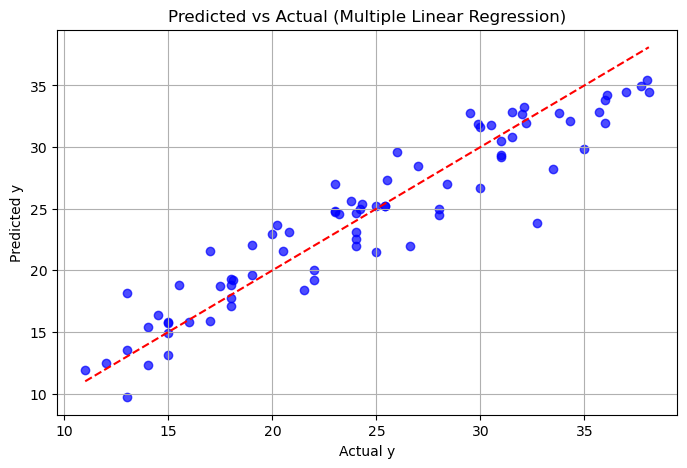

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Predicted vs Actual (Multiple Linear Regression)")
plt.grid(True)
plt.show()

# Interpretation:

✅ Test R² (0.8840) > Train R² (0.8550) — great generalization, still no overfitting

✅ MSE + MAE continue to drop on both sets — model is converging

✅ Even better test performance confirms optimization path is strong and stable

But Compared to the unregularized version, this presents no advantage or betterment compared to it. Hence this model will not be deployed.

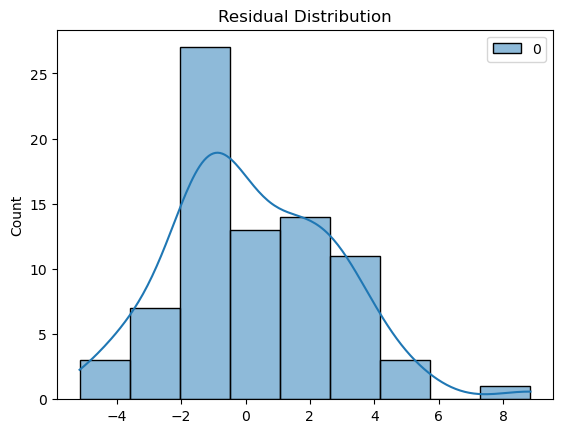

In [58]:
import seaborn as sns

residuals = y_test - y_pred_test

# Histogram works — leave as-is
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

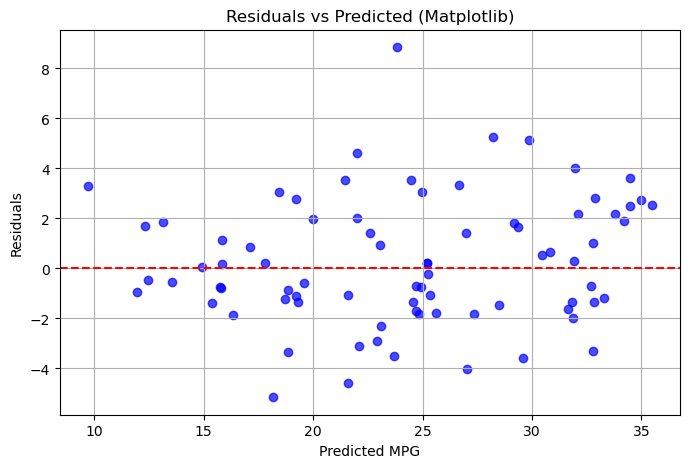

In [59]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_test, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Matplotlib)")
plt.grid(True)
plt.show()

Residuals look evenly distributed

No strong trend or shape, which means model generalized

In [60]:
#Converting logs to DataFrame
df_log = pd.DataFrame({
    'iteration': iteration_log,
    'cost': cost_log,
    'bias': bias_log,
    'weight_log' : weight_log
})

#Saving log
#df_log.to_csv('gd_convergence_log.csv', index=False)

NameError: name 'iteration_log' is not defined

In [ ]:
# Step 1: Convert X_train_scaled to DataFrame
X_scaled_df = pd.DataFrame(X_train_scaled, columns=[f'feature_{i}' for i in range(X_train_scaled.shape[1])])

# Step 2: Combine with y_train
df_log_Xny_train = X_scaled_df.copy()

df_log_Xny_train['y_train'] = y_train.ravel()  # or y_train.flatten()

#Saving log
#df_log_Xny_train.to_csv('X-and-y-train.csv')